# Analyse Exploratoire

### Import des modules

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import joblib

### Analyse Exploratoire

In [16]:

df_eval = pd.read_csv("../data/extrait_eval.csv")

In [17]:
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), object(3)
memory usage:

In [18]:
df_sirh = pd.read_csv("../data/extrait_sirh.csv")
df_sirh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB


In [19]:
df_sondage = pd.read_csv("../data/extrait_sondage.csv")
df_sondage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

### Jointure

In [20]:
# Jointure

df_eval['id_employee'] = df_eval['eval_number'].str.extract(r'E_(\d+)').astype(int)
df1 = pd.merge(df_sirh, df_sondage, left_on='id_employee', right_on='code_sondage')
df = pd.merge(df1, df_eval, on='id_employee')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   id_employee                                1470 non-null   int64 
 1   age                                        1470 non-null   int64 
 2   genre                                      1470 non-null   object
 3   revenu_mensuel                             1470 non-null   int64 
 4   statut_marital                             1470 non-null   object
 5   departement                                1470 non-null   object
 6   poste                                      1470 non-null   object
 7   nombre_experiences_precedentes             1470 non-null   int64 
 8   nombre_heures_travailless                  1470 non-null   int64 
 9   annee_experience_totale                    1470 non-null   int64 
 10  annees_dans_l_entreprise            

In [21]:
missing = df.isna().sum()
total_missing = missing.sum() 

print(f"Nombre total de valeurs manquantes : {total_missing}")

Nombre total de valeurs manquantes : 0


In [22]:
# Colonnes non numériques
non_num_cols = df.select_dtypes(exclude=['number']).columns
print("Colonnes non numériques :")
print(non_num_cols.tolist())


Colonnes non numériques :
['genre', 'statut_marital', 'departement', 'poste', 'a_quitte_l_entreprise', 'domaine_etude', 'ayant_enfants', 'frequence_deplacement', 'eval_number', 'heure_supplementaires', 'augementation_salaire_precedente']


In [23]:
cols = ['genre', 'statut_marital', 'departement', 'poste', 
        'a_quitte_l_entreprise', 'domaine_etude', 'ayant_enfants', 
        'frequence_deplacement', 'eval_number', 
        'heure_supplementaires', 'augementation_salaire_precedente']

for col in cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False).head(10)) 


--- genre ---
genre
M    882
F    588
Name: count, dtype: int64

--- statut_marital ---
statut_marital
Marié(e)       673
Célibataire    470
Divorcé(e)     327
Name: count, dtype: int64

--- departement ---
departement
Consulting             961
Commercial             446
Ressources Humaines     63
Name: count, dtype: int64

--- poste ---
poste
Cadre Commercial           326
Assistant de Direction     292
Consultant                 259
Tech Lead                  145
Manager                    131
Senior Manager             102
Représentant Commercial     83
Directeur Technique         80
Ressources Humaines         52
Name: count, dtype: int64

--- a_quitte_l_entreprise ---
a_quitte_l_entreprise
Non    1233
Oui     237
Name: count, dtype: int64

--- domaine_etude ---
domaine_etude
Infra & Cloud              606
Transformation Digitale    464
Marketing                  159
Entrepreunariat            132
Autre                       82
Ressources Humaines         27
Name: count, dtype: i

### Transformation

In [24]:
df['a_quitte_l_entreprise'] = df['a_quitte_l_entreprise'].apply(lambda x: 1 if x == "Oui" else 0)

### Graphiques

/tmp/ipykernel_59630/3756865564.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['a_quitte_l_entreprise'], palette='coolwarm')


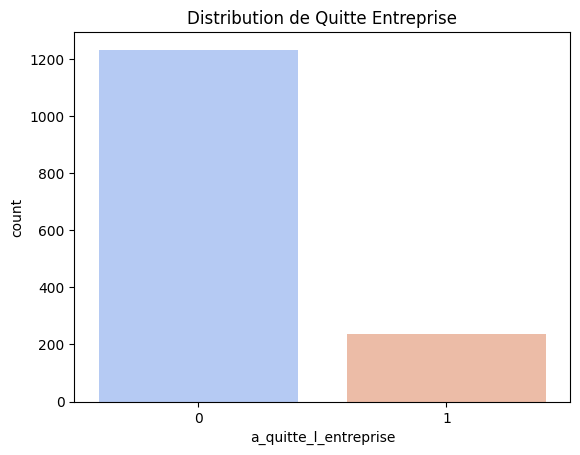

In [25]:
sns.countplot(x=df['a_quitte_l_entreprise'], palette='coolwarm')
plt.title("Distribution de Quitte Entreprise")
plt.show()

/tmp/ipykernel_59630/2985042948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taux_depart.index, y=taux_depart.values, palette='coolwarm')


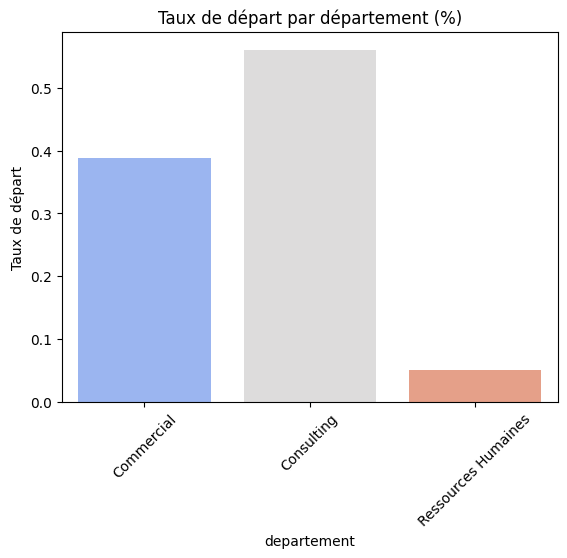

In [26]:
depart_counts = df.groupby('departement')['a_quitte_l_entreprise'].sum()
taux_depart = depart_counts / depart_counts.sum() 

sns.barplot(x=taux_depart.index, y=taux_depart.values, palette='coolwarm')
plt.title("Taux de départ par département (%)")
plt.ylabel("Taux de départ")
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_59630/585941793.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taux_depart.index, y=taux_depart.values, palette='coolwarm')


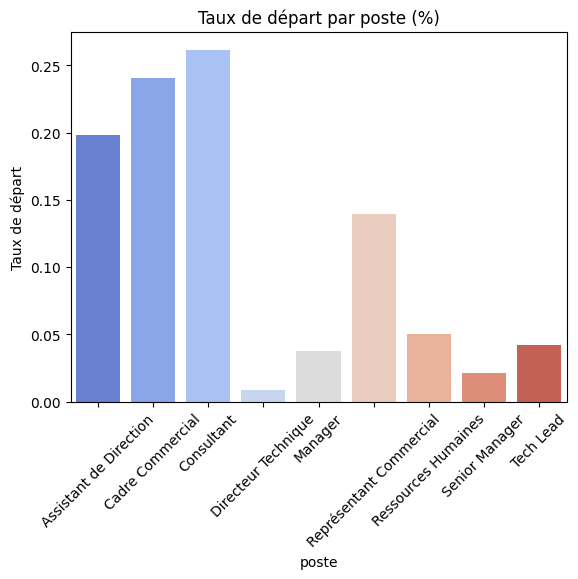

In [27]:
depart_counts = df.groupby('poste')['a_quitte_l_entreprise'].sum()
taux_depart = depart_counts / depart_counts.sum() 

sns.barplot(x=taux_depart.index, y=taux_depart.values, palette='coolwarm')
plt.title("Taux de départ par poste (%)")
plt.ylabel("Taux de départ")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_59630/2361413209.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  depart_counts = df.groupby('tranche_distance')['a_quitte_l_entreprise'].sum()
/tmp/ipykernel_59630/2361413209.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=part_depart.index, y=part_depart.values, palette='coolwarm')


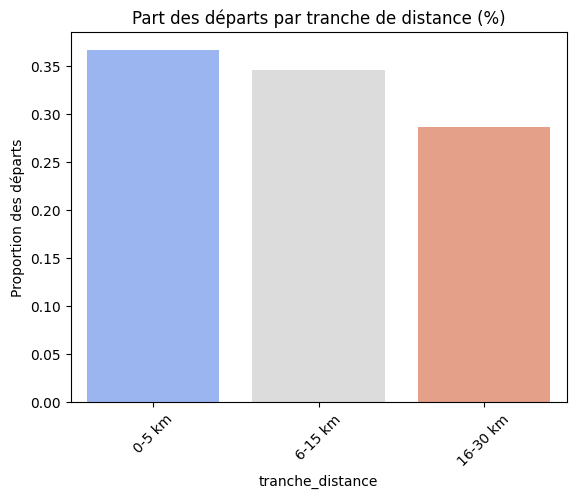

In [28]:
bins   = [0, 5, 15, 30]
labels = ['0-5 km', '6-15 km', '16-30 km']

df['tranche_distance'] = pd.cut(df['distance_domicile_travail'], bins=bins, labels=labels)

# Effectif des départs par tranche
depart_counts = df.groupby('tranche_distance')['a_quitte_l_entreprise'].sum()

# Part relative (somme = 1)
part_depart = depart_counts / depart_counts.sum()

sns.barplot(x=part_depart.index, y=part_depart.values, palette='coolwarm')
plt.title("Part des départs par tranche de distance (%)")
plt.ylabel("Proportion des départs")
plt.xticks(rotation=45)
plt.show()



/tmp/ipykernel_59630/3161717052.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taux_depart_age = df.groupby('tranche_age')['a_quitte_l_entreprise'].mean().sort_values(ascending=False)
/tmp/ipykernel_59630/3161717052.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taux_depart_age.index, y=taux_depart_age.values, palette='coolwarm')


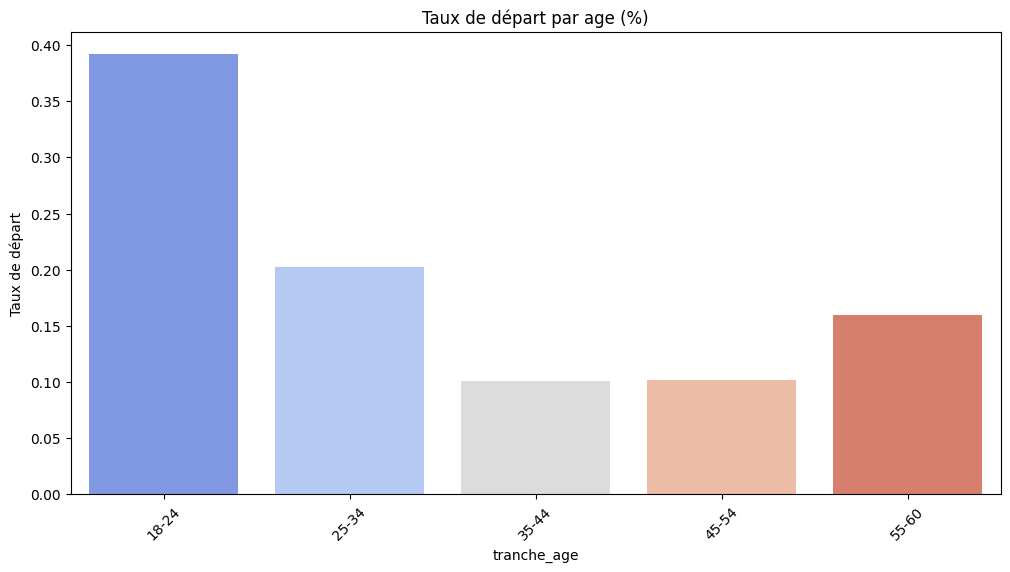

In [29]:
bins = [17, 24, 34, 44, 54, 60]  
labels = ['18-24', '25-34', '35-44', '45-54', '55-60']

df['tranche_age'] = pd.cut(df['age'], bins=bins, labels=labels)

taux_depart_age = df.groupby('tranche_age')['a_quitte_l_entreprise'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(x=taux_depart_age.index, y=taux_depart_age.values, palette='coolwarm')
plt.title("Taux de départ par age (%)")
plt.ylabel("Taux de départ")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_59630/4243839573.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taux_depart.index, y=taux_depart.values, palette='coolwarm')


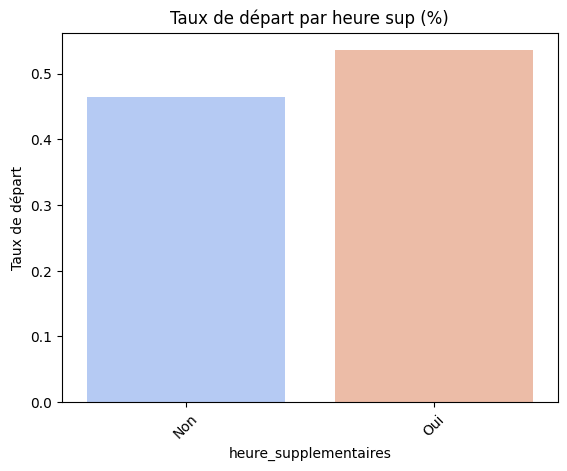

In [30]:
depart_counts = df.groupby('heure_supplementaires')['a_quitte_l_entreprise'].sum()
taux_depart = depart_counts / depart_counts.sum() 

sns.barplot(x=taux_depart.index, y=taux_depart.values, palette='coolwarm')
plt.title("Taux de départ par heure sup (%)")
plt.ylabel("Taux de départ")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_59630/1319685123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taux_exp.index, y=taux_exp.values, palette='coolwarm')


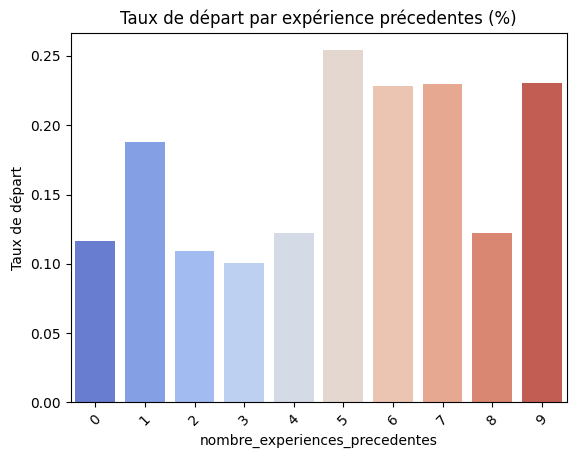

In [31]:
taux_exp = df.groupby('nombre_experiences_precedentes')['a_quitte_l_entreprise'].mean().sort_values(ascending=False)

sns.barplot(x=taux_exp.index, y=taux_exp.values, palette='coolwarm')
plt.title("Taux de départ par expérience précedentes (%)")
plt.ylabel("Taux de départ")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_59630/3853895492.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taux_pee.index, y=taux_pee.values, palette='coolwarm')


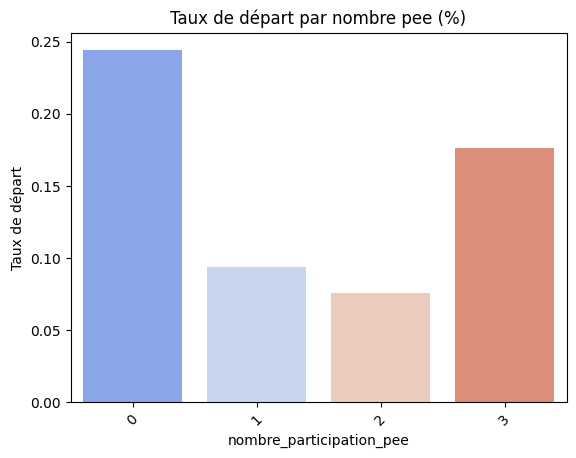

In [32]:
taux_pee = df.groupby('nombre_participation_pee')['a_quitte_l_entreprise'].mean().sort_values(ascending=False)

sns.barplot(x=taux_pee.index, y=taux_pee.values, palette='coolwarm')
plt.title("Taux de départ par nombre pee (%)")
plt.ylabel("Taux de départ")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_59630/3110367246.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tranche_revenu')['a_quitte_l_entreprise']
/tmp/ipykernel_59630/3110367246.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taux_revenu.index.astype(str), y=taux_revenu.values, palette='coolwarm')


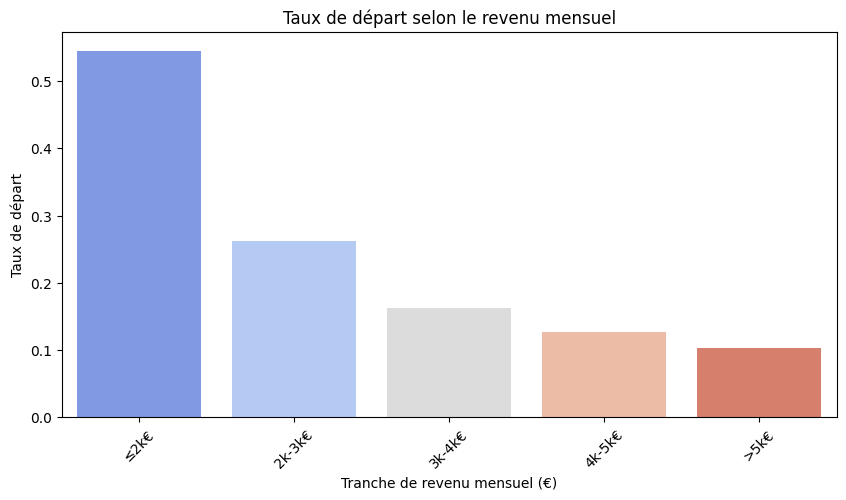

In [33]:
# Création de tranche de revenu
bins   = [0, 2000, 3000, 4000, 5000, np.inf]
labels = ['≤2k€', '2k-3k€', '3k-4k€', '4k-5k€', '>5k€']

# Taux par tranche de revenu sur a quitte entreprise
df['tranche_revenu'] = pd.cut(
    df['revenu_mensuel'],
    bins=bins, labels=labels,
    include_lowest=True, right=True
)

taux_revenu = (
    df.groupby('tranche_revenu')['a_quitte_l_entreprise']
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=taux_revenu.index.astype(str), y=taux_revenu.values, palette='coolwarm')
plt.title("Taux de départ selon le revenu mensuel")
plt.xlabel("Tranche de revenu mensuel (€)")
plt.ylabel("Taux de départ")
plt.xticks(rotation=45)
plt.show()

# Hypothèses

### 1. Le département Commercial présenterait un taux de départ plus élevé

### 2. Les heures supplémentaires influenceraient significativement le départ

### 3. La satisfaction liée à l’équilibre vie professionnelle / vie personnelle aurait un impact important

### 4. Le revenu jouerait un rôle important dans le fait que le salarié quitte ou non l'entreprise.



In [34]:
joblib.dump(df, "df.joblib")


['df.joblib']